In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Models
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier

# Preprocessing & Scaling
from sklearn.preprocessing import StandardScaler

# Train-Test Split
from sklearn.model_selection import train_test_split


In [2]:
df = pd.read_csv("heart.csv")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


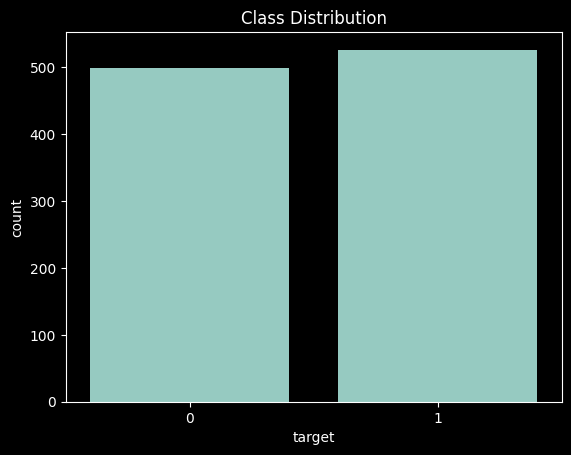

Number of duplicate rows: 723
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
Categorical Columns: Index([], dtype='object')


In [14]:
# Basic info
df.info()
df.describe()

plt.style.use('dark_background')
# Check target balance
sns.countplot(x='target', data=df)
plt.title("Class Distribution")
plt.show()

# Check for duplicates
print("Number of duplicate rows:", df.duplicated().sum())

# Check for missing values
print(df.isnull().sum())

# Check categorical columns
categorical_cols = df.select_dtypes(include='object').columns
print("Categorical Columns:", categorical_cols)


In [7]:
x = df.drop('target', axis=1)
y = df['target']

In [8]:
# First split: Train 80%, Test 20%
x_train_full, x_test, y_train_full, y_test = train_test_split(
    x, y, test_size=0.2, random_state=0, stratify=y
)

# Validation split: 30% of training → validation set
x_train, x_val, y_train, y_val = train_test_split(
    x_train_full, y_train_full, test_size=0.3, random_state=0, stratify=y_train_full
)


In [10]:
# Initialize models
rf = RandomForestClassifier(random_state=0)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=0)
adb = AdaBoostClassifier(random_state=0)

# Fit models
rf.fit(x_train, y_train)
xgb.fit(x_train, y_train)
adb.fit(x_train, y_train)


C:\Users\Laibaa\AppData\Roaming\Python\Python313\site-packages\xgboost\training.py:183: UserWarning: [01:55:36] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,estimator,None
,n_estimators,50
,learning_rate,1.0
,algorithm,'deprecated'
,random_state,0


In [11]:
models = {'Random Forest': rf, 'XGBoost': xgb, 'AdaBoost': adb}

for name, model in models.items():
    train_acc = model.score(x_train, y_train)
    val_acc   = model.score(x_val, y_val)
    test_acc  = model.score(x_test, y_test)
    print(f"{name} - Train: {train_acc:.2f}, Validation: {val_acc:.2f}, Test: {test_acc:.2f}")


Random Forest - Train: 1.00, Validation: 0.99, Test: 1.00
XGBoost - Train: 1.00, Validation: 0.98, Test: 0.99
AdaBoost - Train: 0.90, Validation: 0.87, Test: 0.85


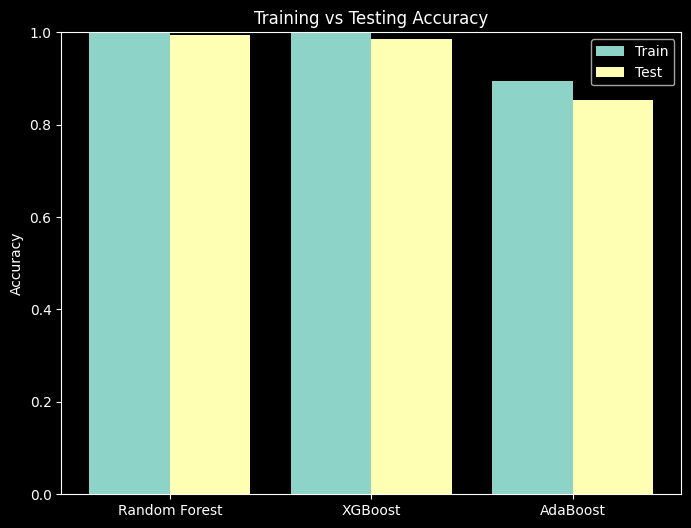

In [13]:
plt.style.use('dark_background')
train_acc = [rf.score(x_train, y_train), xgb.score(x_train, y_train), adb.score(x_train, y_train)]
test_acc  = [rf.score(x_test, y_test), xgb.score(x_test, y_test), adb.score(x_test, y_test)]
models_names = ['Random Forest', 'XGBoost', 'AdaBoost']

plt.figure(figsize=(8,6))
plt.bar(np.arange(len(models_names)) - 0.2, train_acc, width=0.4, label='Train', )
plt.bar(np.arange(len(models_names)) + 0.2, test_acc, width=0.4, label='Test')
plt.xticks(np.arange(len(models_names)), models_names)
plt.ylim(0,1)
plt.ylabel("Accuracy")
plt.title("Training vs Testing Accuracy")
plt.legend()
plt.show()
